In [78]:
import re
import numpy as np
import pandas as pd
import gensim
import nltk
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense,AveragePooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l1
from gensim.models import Word2Vec, FastText
from gensim.models.keyedvectors import KeyedVectors
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, GRU, Conv1D, MaxPooling1D, Flatten, Attention, Input

In [79]:
data=pd.read_csv(r'D:\CODING\Python\NLP\END_SEM\hindi_data.csv')

In [80]:
data.head()

,text,sentiment
0,लोग वतन तक खा जाते हैं इसका इसे यकीन नहींमान ज...,negative
1,गुमनाम है वतन पर मिटने वाले लोग आतन्कवादियों स...,negative
2,ज़ंजीर बदली जा रही थी मैं समझा था रिहाई हो गयी है,negative
3,यूपी में बड़े स्तर पर दंगे करवा सकती है बीजेपी...,negative
4,अंग्रेजी नहीं आती है इसलिए हिन्दी ट्विट ज्यादा...,negative


In [81]:
data.dropna(inplace=True)

In [82]:
def preprocess_and_clean_hindi(text):
    # Define the function to preprocess Hindi text by tokenizing
    def preprocess_text_hindi(text):
        tokens = text.split(" ")
        return tokens

    # Define the function to remove non-Hindi characters while preserving spaces
    def remove_non_hindi(text):
        hindi_pattern = re.compile("[\u0900-\u097F\s]+")  # Unicode range for Hindi characters and space
        hindi_text = hindi_pattern.findall(text)
        cleaned_text = ''.join(hindi_text)
        return cleaned_text

    # Tokenize the text
    tokens = preprocess_text_hindi(text)

    # Remove non-Hindi characters while preserving spaces
    cleaned_text = list(map(remove_non_hindi,tokens))

    return cleaned_text

data['text'] = data['text'].apply(preprocess_and_clean_hindi)

data['label'] = data['sentiment'].map({'positive': 1, 'negative': 0,'neutral': 2})


In [83]:
def load_glove(glove_file):
    with open(glove_file, 'r', encoding='utf-8') as f:
        word_embeddings = {}
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            word_embeddings[word] = vector
    return word_embeddings

def generate_embedding_matrix(word_vector, embedding_model, embedding_type, max_length=200):
    if embedding_type == 'glove':
        embedding_dim = len(next(iter(embedding_model.values())))
        embedding_matrix = np.zeros((max_length, embedding_dim))
        for i, word in enumerate(word_vector):
            if word in embedding_model:
                embedding_matrix[i] = embedding_model[word]
            if i >= max_length - 1:
                break
    else:
        word_embeddings = []
        for word in word_vector:
            if word in embedding_model.wv:
                word_embedding = embedding_model.wv[word]
                word_embeddings.append(word_embedding)
        embedding_matrix = np.array(word_embeddings)
        if len(embedding_matrix) < max_length:
            embedding_matrix = np.pad(embedding_matrix, ((0, max_length - len(embedding_matrix)), (0, 0)), mode='constant')
        else:
            embedding_matrix = embedding_matrix[:max_length, :]
    return np.sum(embedding_matrix, axis=0)

def train_word2vec(corpus, vector_size=100, window=10, min_count=1, workers=4, sg=1):
    return Word2Vec(sentences=corpus, vector_size=vector_size, window=window, min_count=min_count, workers=workers, sg=sg)

def train_fasttext(corpus, vector_size=100, window=10, min_count=1, workers=4, sg=1):
    return FastText(sentences=corpus, vector_size=vector_size, window=window, min_count=min_count, workers=workers, sg=sg)

def choose_embedding_model(corpus, model_type, glove_file):
    if model_type == 'word2vec':
        model = train_word2vec(corpus)
    elif model_type == 'fasttext':
        model = train_fasttext(corpus)
    elif model_type == 'glove' and glove_file is not None:
        model = load_glove(glove_file)
    else:
        raise ValueError("Invalid model type or missing GloVe file.")
    return model


In [84]:
data = data[data.iloc[:, -1] != 2]
tokenized_corpus=data['text'].to_list()

In [85]:
embedding_type = 'word2vec' 
embedding_model = choose_embedding_model(tokenized_corpus, model_type=embedding_type, glove_file=r'D:\CODING\Python\NLP\END_SEM\glove\hindi\vectors.txt')
data['embedding_matrix'] = data['text'].apply(lambda x: generate_embedding_matrix(x, embedding_model, embedding_type))
X = np.array(data['embedding_matrix'].tolist())
y=data['label'] 

In [86]:
ntk=NTK(3)
svm_classifier = SVC(kernel=ntk)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [88]:
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)



In [89]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.65      0.59      0.62       208
           1       0.62      0.69      0.65       208

    accuracy                           0.64       416
   macro avg       0.64      0.64      0.64       416
weighted avg       0.64      0.64      0.64       416



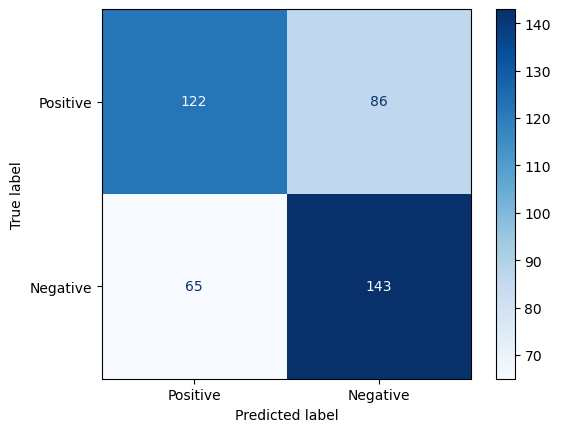

In [90]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Positive', 'Negative'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

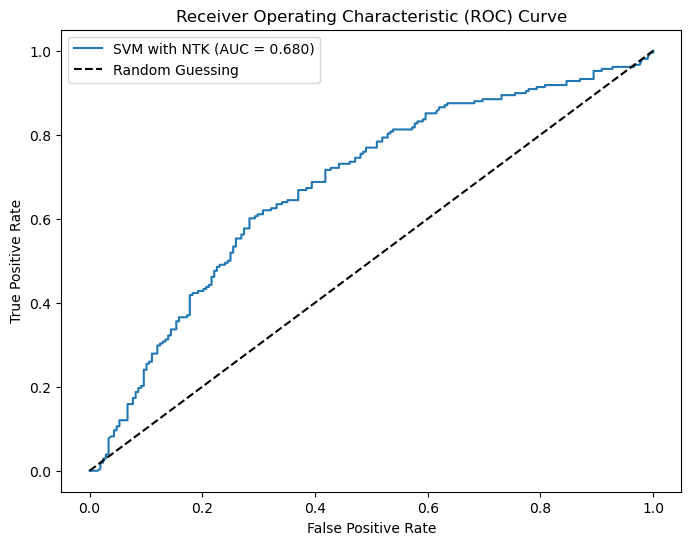

In [91]:
# Apply ROC AUC curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# SVM
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_classifier.decision_function(X_test))
svm_auc = auc(svm_fpr, svm_tpr)
ax.plot(svm_fpr, svm_tpr, label='SVM with NTK (AUC = {:.3f})'.format(svm_auc))

# Random guessing line
ax.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

# Axis labels and title
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')

# Legend
ax.legend(loc='best')

# Show the plot
plt.show()



For NTK with kernel depth 1

In [92]:
data=pd.read_csv(r'D:\CODING\Python\NLP\END_SEM\hindi_data.csv')

In [93]:
data.dropna(inplace=True)

In [94]:
def preprocess_and_clean_hindi(text):
    # Define the function to preprocess Hindi text by tokenizing
    def preprocess_text_hindi(text):
        tokens = text.split(" ")
        return tokens

    # Define the function to remove non-Hindi characters while preserving spaces
    def remove_non_hindi(text):
        hindi_pattern = re.compile("[\u0900-\u097F\s]+")  # Unicode range for Hindi characters and space
        hindi_text = hindi_pattern.findall(text)
        cleaned_text = ''.join(hindi_text)
        return cleaned_text

    # Tokenize the text
    tokens = preprocess_text_hindi(text)

    # Remove non-Hindi characters while preserving spaces
    cleaned_text = list(map(remove_non_hindi,tokens))

    return cleaned_text

data['text'] = data['text'].apply(preprocess_and_clean_hindi)

data['label'] = data['sentiment'].map({'positive': 1, 'negative': 0,'neutral': 2})


In [95]:
data = data[data['label'] != 2]

In [96]:
def generate_embedding_vector(word_vector, word2vec_model):
    word_embeddings = []
    for word in word_vector:
        if word in word2vec_model.wv:
            word_embedding = word2vec_model.wv[word]
            word_embeddings.append(word_embedding)

    embedding_vector = np.sum(word_embeddings, axis=0)
    return embedding_vector


In [97]:
tokenized_corpus=data['text'].to_list()

In [98]:
word2vec_model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)

In [99]:
data['embedding_vector'] = data['text'].apply(lambda x: generate_embedding_vector(x, word2vec_model))

In [100]:
X = np.array(data['embedding_vector'].tolist())
y = np.array(data['label'].tolist())

del data
del tokenized_corpus

In [101]:
ntk=NTK(1)
svm_classifier = SVC(kernel=ntk)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [103]:
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)



In [104]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.56      0.61       208
           1       0.62      0.73      0.67       208

    accuracy                           0.64       416
   macro avg       0.65      0.64      0.64       416
weighted avg       0.65      0.64      0.64       416



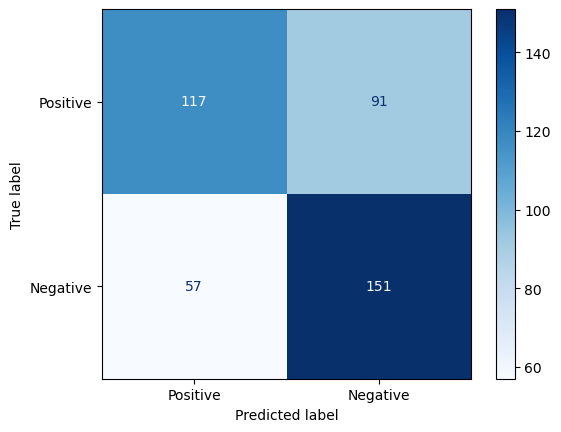

In [105]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Positive', 'Negative'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

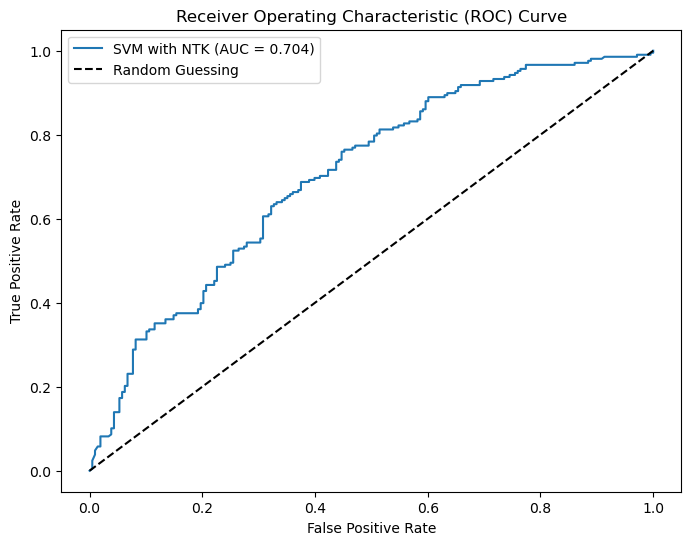

In [106]:
# Apply ROC AUC curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# SVM
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_classifier.decision_function(X_test))
svm_auc = auc(svm_fpr, svm_tpr)
ax.plot(svm_fpr, svm_tpr, label='SVM with NTK (AUC = {:.3f})'.format(svm_auc))

# Random guessing line
ax.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

# Axis labels and title
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')

# Legend
ax.legend(loc='best')

# Show the plot
plt.show()



With NTK depth 5

In [107]:
data=pd.read_csv(r'D:\CODING\Python\NLP\END_SEM\hindi_data.csv')

In [108]:
data.dropna(inplace=True)

In [109]:
def preprocess_and_clean_hindi(text):
    # Define the function to preprocess Hindi text by tokenizing
    def preprocess_text_hindi(text):
        tokens = text.split(" ")
        return tokens

    # Define the function to remove non-Hindi characters while preserving spaces
    def remove_non_hindi(text):
        hindi_pattern = re.compile("[\u0900-\u097F\s]+")  # Unicode range for Hindi characters and space
        hindi_text = hindi_pattern.findall(text)
        cleaned_text = ''.join(hindi_text)
        return cleaned_text

    # Tokenize the text
    tokens = preprocess_text_hindi(text)

    # Remove non-Hindi characters while preserving spaces
    cleaned_text = list(map(remove_non_hindi,tokens))

    return cleaned_text

data['text'] = data['text'].apply(preprocess_and_clean_hindi)

data['label'] = data['sentiment'].map({'positive': 1, 'negative': 0,'neutral': 2})


In [110]:
data = data[data['label'] != 2]

In [111]:
def generate_embedding_vector(word_vector, word2vec_model):
    word_embeddings = []
    for word in word_vector:
        if word in word2vec_model.wv:
            word_embedding = word2vec_model.wv[word]
            word_embeddings.append(word_embedding)

    embedding_vector = np.sum(word_embeddings, axis=0)
    return embedding_vector


In [112]:
tokenized_corpus=data['text'].to_list()

In [113]:
word2vec_model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)

In [114]:
data['embedding_vector'] = data['text'].apply(lambda x: generate_embedding_vector(x, word2vec_model))

In [115]:
X = np.array(data['embedding_vector'].tolist())
y = np.array(data['label'].tolist())

del data
del tokenized_corpus

In [116]:
ntk=NTK(5)
svm_classifier = SVC(kernel=ntk)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [118]:
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

In [119]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.65      0.63      0.64       208
           1       0.64      0.66      0.65       208

    accuracy                           0.64       416
   macro avg       0.64      0.64      0.64       416
weighted avg       0.64      0.64      0.64       416



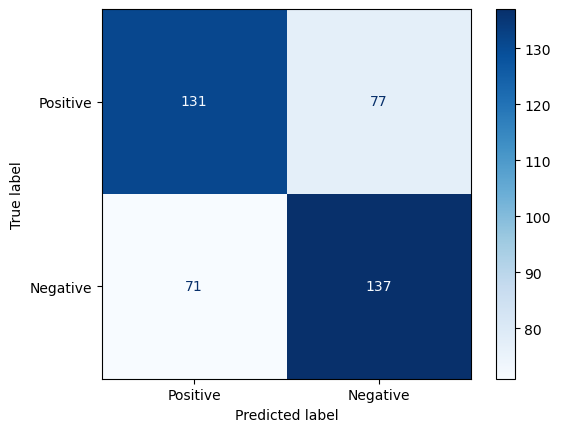

In [120]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Positive', 'Negative'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

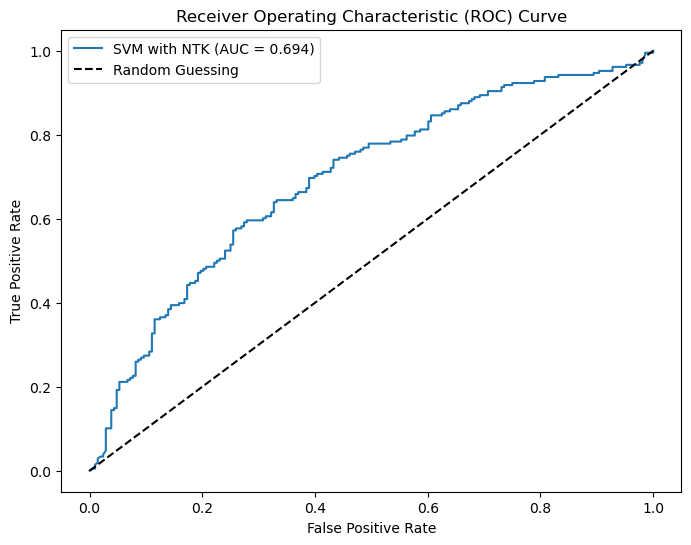

In [121]:
# Apply ROC AUC curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# SVM
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_classifier.decision_function(X_test))
svm_auc = auc(svm_fpr, svm_tpr)
ax.plot(svm_fpr, svm_tpr, label='SVM with NTK (AUC = {:.3f})'.format(svm_auc))

# Random guessing line
ax.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

# Axis labels and title
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')

# Legend
ax.legend(loc='best')

# Show the plot
plt.show()